In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 5.1

In [2]:
df = pd.read_csv('MINDTREE.csv',parse_dates=True, index_col='Date')
df.head(3)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.5,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.0,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.0,506.35,512.10,391401,2.004375e+08,13341,150098,38.35


In [3]:
annual_mean = np.mean(df['Close Price'].pct_change()* 100) * 252
annual_stddev = np.std(df['Close Price'].pct_change()* 100) * 252

In [4]:
print('Annual mean for mindtree is' +str(annual_mean))
print('Annual standard Deviation for mindtree is' +str(annual_stddev))

Annual mean for mindtree is39.256977404925
Annual standard Deviation for mindtree is541.540786099111


In [5]:
df = df[['Close Price']]

## 5.2

In [6]:
df1 = pd.read_csv('APOLLOTYRE.csv', parse_dates=True, index_col='Date')
df2 = pd.read_csv('ASIANPAINT.csv',  parse_dates=True, index_col='Date')
df3 = pd.read_csv('ADANIPOWER.csv',  parse_dates=True, index_col='Date')
df4 = pd.read_csv('GODREJIND.csv',  parse_dates=True, index_col='Date')

In [7]:
df1 = df1[["Close Price"]]
df2 = df2[["Close Price"]]
df3 = df3[["Close Price"]]
df4 = df4[["Close Price"]]

In [8]:
df1.head(3)

,Close Price
Date,
2017-05-15,231.90
2017-05-16,234.40
2017-05-17,237.35


In [9]:
len(df1)

494

In [10]:
dfnew = [df, df1, df2, df3, df4]

In [11]:
from functools import *

In [12]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), dfnew)

In [13]:
df_merged.columns = ['Mindtree', 'Apollotyres', 'Pnb', 'AdaniPower', 'Godrej']

In [14]:
df_merged.head(3)

,Mindtree,Apollotyres,Pnb,AdaniPower,Godrej
Date,,,,,
2017-05-15,509.45,231.90,1148.05,30.25,578.55
2017-05-16,511.30,234.40,1142.85,32.85,584.80
2017-05-17,506.35,237.35,1154.95,33.10,588.60


In [15]:
returns = df_merged.pct_change()

In [16]:
returns.dropna(inplace=True)

In [17]:
mean_returns = returns.mean()
cov = returns.cov()
weight = [0.2, 0.2,0.2,0.2, 0.2]

In [18]:
mean_returns

Mindtree       0.001555
Apollotyres   -0.000255
Pnb            0.000388
AdaniPower     0.001209
Godrej        -0.000357
dtype: float64

In [19]:
portfolio_return = np.sum(mean_returns * weight) * 252
portfolio_volatility = np.dot(np.transpose(weight), np.dot(cov, weight)) * np.sqrt(252)
print('The Annual portfolio return is' + str(portfolio_return))
print('the Annual Volatility of Portfolio is' + str(portfolio_volatility))

The Annual portfolio return is0.12799623026598558
the Annual Volatility of Portfolio is0.0030290718465134023


## 5.3

In [20]:
num_portfolios = 25000
#set up array to hold results
results = np.zeros((3,num_portfolios))

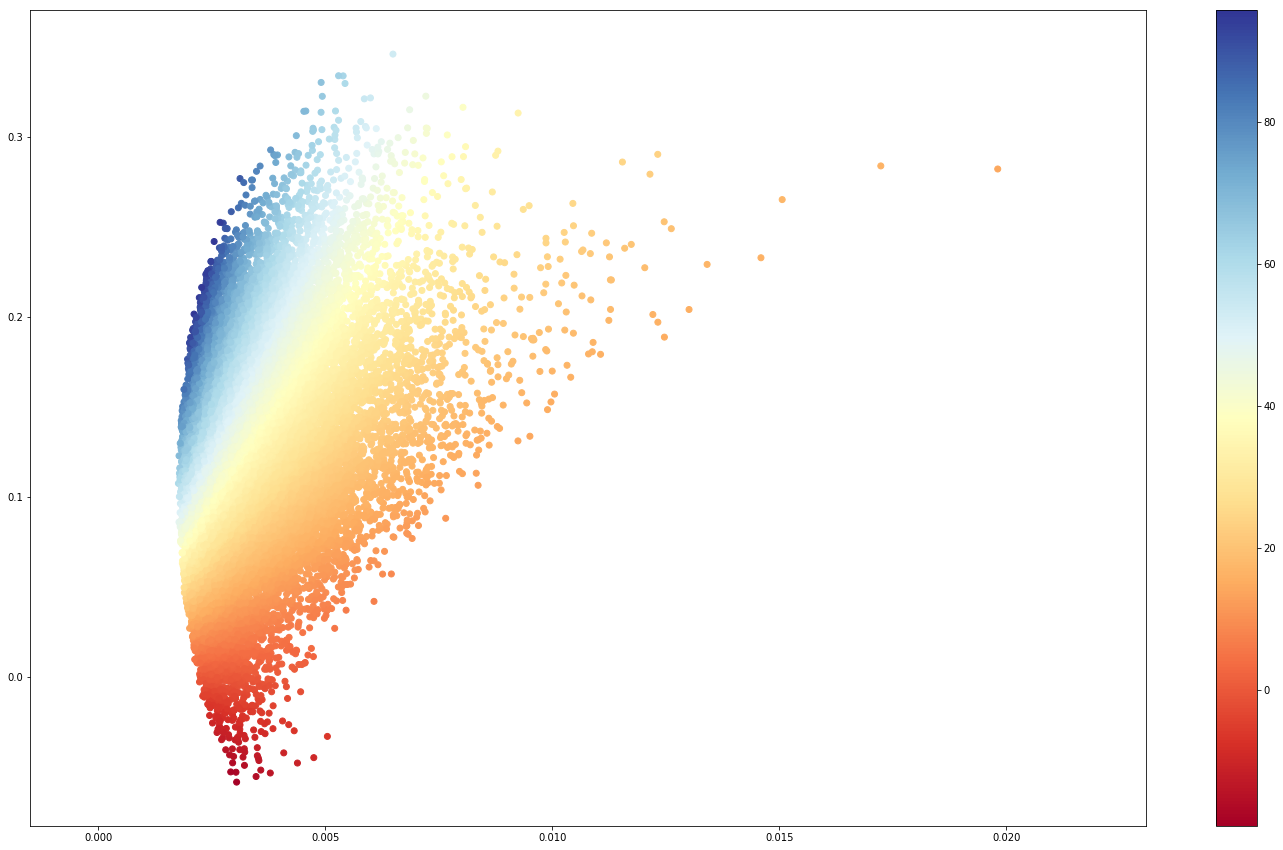

In [21]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return1 = np.sum(mean_returns * weights) * 252
    portfolio_volatility1 = np.dot(np.transpose(weights), np.dot(cov, weights)) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return1
    results[1,i] = portfolio_volatility1
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','volatility','sharpe'])
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize= (25, 15))
plt.scatter(results_frame.volatility,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

## 5.4

In [22]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['volatility'].idxmin()]

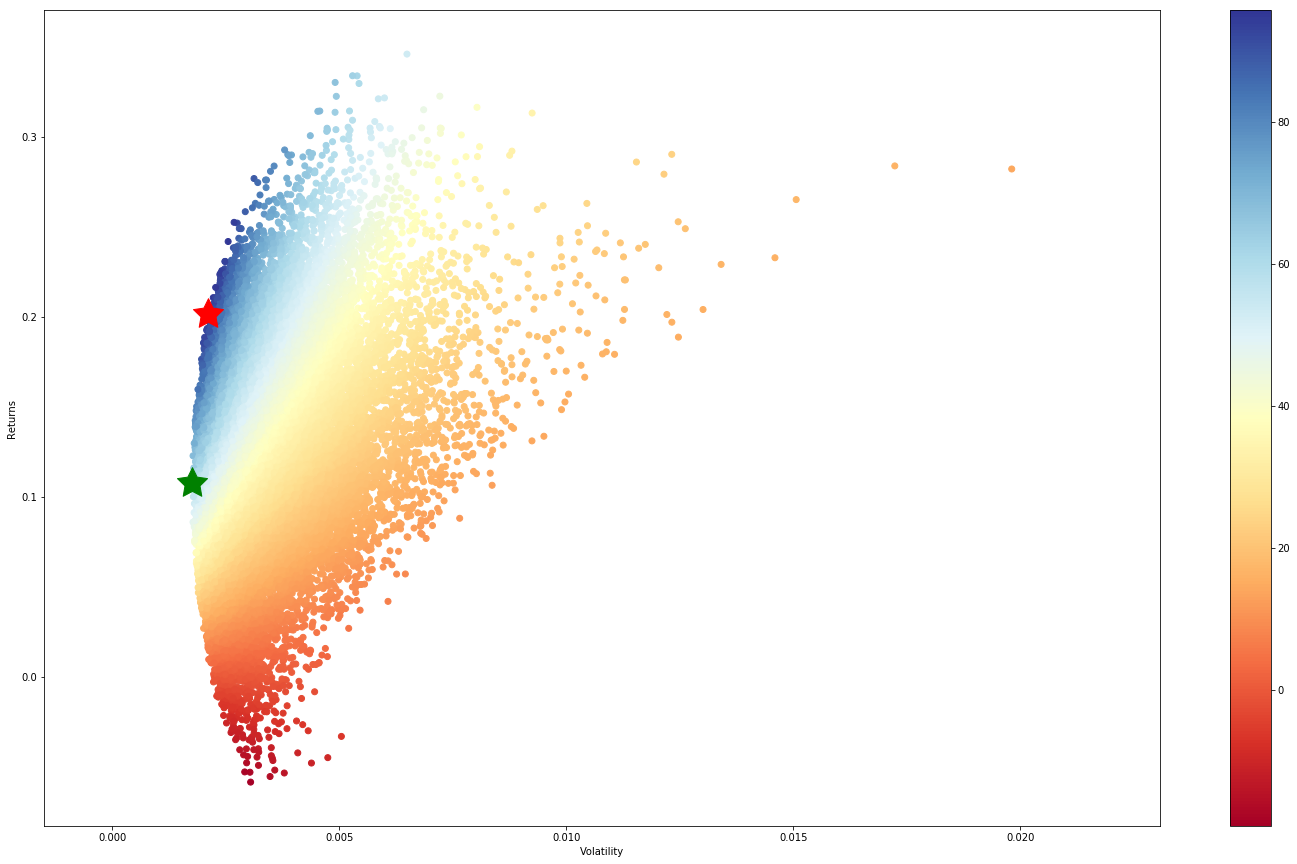

In [23]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize= (25, 15))
plt.scatter(results_frame.volatility,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)